<img style="center" width="300" src="static/images/logo-training.png" />

<h1  style="text-align:center"> Notebook #7 </h1>

<h1>KNN</h1>
<h2>K-nearnest-neighbors</h2>
<p> Some models are very interesting to work with because they show how a simple idea can lead to a powerful model.
We will here show the K-neighbors model. The idea is to find the K (an integer) nearest neighbors of a point (i.e. a specific sample) to predict its own label</p>
<img src="https://i0.wp.com/adataanalyst.com/wp-content/uploads/2016/07/kNN-1.png?w=267" width="600"/>

<p>
    Also, note that :
    <ul>
        <li>The position of a point is based on the value of its features</li>
        <li>Given K a number of neighbors, the final prediciton can vary (on the image above, two different prediciton can be made depeding on the value of K, 3 or 5 </li>
        <li>This model has no parameters, it will only compute the distances between the samples to save time during the inference</li>
    </ul>
</p>

In [325]:
%pylab inline
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 16, 4
import matplotlib.pyplot as pp

Populating the interactive namespace from numpy and matplotlib


<p>
    The cells below will recreate the new features introduced in the notebook n° 4.
</p>

In [319]:
dataset = pd.read_csv("./customerLifetimeValue.csv", sep=";")
#We take the columns we need for our models and get the underlying matrix
X_numeric = dataset[["price_first_item_purchased", "pages_visited"]].values
#We also take a categorical variable
X_categorical = dataset["Country"]
#and we create a new feature
dataset["priceByVisited_pages"] = dataset["price_first_item_purchased"] / dataset["pages_visited"]
X_new_feature  = dataset["priceByVisited_pages"].values.reshape((-1, 1))
#We binarize the target, all value greater than a given revenue will become positive (1), other negative(0)
y = dataset["revenue"].values
y[y <= 175] = 0
y[y > 175] = 1

In [320]:
from sklearn.preprocessing import LabelBinarizer
#We fill missing categorical value with "unknown"
#like linear model, KNN needs binarized categories
X_categorical.fillna("unknown", inplace=True)
my_binarizer = LabelBinarizer()
binarized_categories = my_binarizer.fit_transform(X_categorical)

In [321]:
#We join data, but with this model we don't need to drop the first column
#then we concatenate the matrix with the numerical variables
X = np.hstack([X_numeric, binarized_categories, X_new_feature])

<p>
    As you can see, the syntax is always pretty much the same : feature creation, splitting test and train, fitting the model...
</p>

In [322]:
#We create test and train datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1337)
#first we try with five neighbors
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [323]:
from sklearn.metrics import roc_auc_score
train_score = roc_auc_score(y_train, model.predict(X_train))
test_score = roc_auc_score(y_test, model.predict(X_test))
print("train score : %f, test score : %f"%(train_score, test_score))

train score : 0.771147, test score : 0.748106


As you can see, the model works well but it require the number of neighbors to select. To define the best number of neighbors, we will test different K values 

In [324]:
kValues = []
testValues = []
for n in range(2, 20) :
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    predicted_test = model.predict(X_test)
    predicted_train = model.predict(X_train)
    score_test = roc_auc_score(y_test, predicted_test)
    score_train = roc_auc_score(y_train, predicted_train)
    testValues.append(score_test)
    kValues.append(n)
    #print("K : %d, train score : %f, test score : %f"%(n, score_train, score_test))


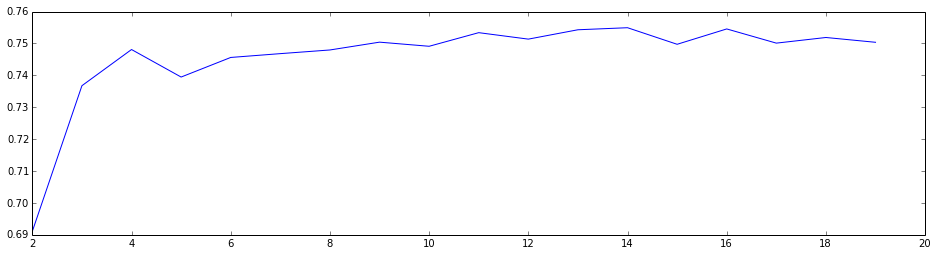

In [326]:
_=plt.plot(kValues, testValues)

<p>In the cell above, we've tested different values of K. This method is called Grid-Search : different hyper-parameters (parmeters that are not learnt but choosen by the data scientist) are tested to find the optimal value.</p>
<p>
    The image below shows how the classification boundary changes depending on K :
    <img src="https://elvinouyang.github.io/assets/images/Introduction%20to%20Machine%20Learning%20with%20Python%20-%20Chapter%202%20-%20Datasets%20and%20kNN_files/Introduction%20to%20Machine%20Learning%20with%20Python%20-%20Chapter%202%20-%20Datasets%20and%20kNN_31_1.png" />
</p>



<p>
    Now its your turn : try to predict the country of a buyer given the features of your choice !
</p>
<em>Note that the AUC metric only works in binary problems</em> 